# Application Programming Interface

**Definition**  
> Application Program Interfaces, or APIs, are commonly used to retrieve data from remote websites.  
> To use an API, you make a request to a remote web server, and retrieve the data you need.

**Why use API?**
> Quickly changing data. Eg - Stock Market Data.  
> In case you want a small piece of a much larger dataset. Eg - Twitter.

**API Request**
> In order to get the data, we make a request to a webserver.  
> The server then replies with our data.  
> In Python, we'll use the **requests** module to do this.  
> There are many different types of requests.   
> The most commonly used one, a **GET request**, is used to retrieve data  

```python
import requests
response = requests.get("URI")
```

### International Space Station API
**Demonstrating an example with OpenNotify API**  
In order to demonstrate, we will be using OpenNotify's API. OpenNotify has several API endpoints.  
**OpenNotify API Documentation -** http://open-notify.org/Open-Notify-API/

**API Endpoint**
> An API endpoint is a digital location where an API receives requests about a specific resource on its server. 

**iss-now.json endpoint**
> The first endpoint we'll look at on OpenNotify is the iss-now.json endpoint.  
> This endpoint gets the current latitude and longitude of the International Space Station.   
> As you can see, retrieving this data isn't a great fit for a dataset, because it involves some calculation on the server, and changes quickly.


### Example 1

In [1]:
import requests

In [2]:
# Make a get request to get the latest position of 
# the international space station from the opennotify api.
response = requests.get("http://api.open-notify.org/iss-now.json")

In [3]:
# Check the response URL
response.url

'http://api.open-notify.org/iss-now.json'

In [4]:
# Check the status code of the response.
response.status_code

200

In [5]:
response.headers

{'Server': 'nginx/1.10.3', 'Date': 'Tue, 06 Dec 2022 18:34:50 GMT', 'Content-Type': 'application/json', 'Content-Length': '115', 'Connection': 'keep-alive', 'access-control-allow-origin': '*'}

In [6]:
# Check the response content type
response.headers['Content-Type']

'application/json'

In [7]:
# Check the response encoding
response.encoding

'utf-8'

In [8]:
# Response Content
response.text

'{"iss_position": {"latitude": "-27.8367", "longitude": "-177.3435"}, "message": "success", "timestamp": 1670351690}'

In [9]:
# Binary Response Content
# This is useful if the response body contains non-text data
response.content

b'{"iss_position": {"latitude": "-27.8367", "longitude": "-177.3435"}, "message": "success", "timestamp": 1670351690}'

In [10]:
# JSON Response Content
response.json()

{'iss_position': {'latitude': '-27.8367', 'longitude': '-177.3435'},
 'message': 'success',
 'timestamp': 1670351690}

### Example 2

In [11]:
import requests

In [12]:
# Make a get request to get the latest position of 
# the international space station from the opennotify api.
response = requests.get("https://google.com/search?q=thataiguy")

In [13]:
# Check the response URL
response.url

'https://www.google.com/search?q=thataiguy'

In [14]:
# Check the status code of the response.
response.status_code

200

In [15]:
response.headers

{'Content-Type': 'text/html; charset=ISO-8859-1', 'Date': 'Tue, 06 Dec 2022 18:34:55 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Security-Policy': "object-src 'none';base-uri 'self';script-src 'nonce-4xkZtvUzx70Iy7MiF5tavw' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/xsrp", 'Cross-Origin-Opener-Policy-Report-Only': 'same-origin-allow-popups; report-to="gws"', 'Report-To': '{"group":"gws","max_age":2592000,"endpoints":[{"url":"https://csp.withgoogle.com/csp/report-to/gws/xsrp"}]}', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2022-12-06-18; expires=Thu, 05-Jan-2023 18:34:55 GMT; path=/; domain=.google.com; Secure, AEC=AakniGNmE_aphNNiMT_NZuAp1WADIQsgq7JE8DfPQq8VU3bRIjmIaMVnvw; expires=Sun, 04-Jun-2023 18:34:55 GMT; path=/; domain=.go

In [16]:
# Check the response content type
response.headers['Content-Type']

'text/html; charset=ISO-8859-1'

In [17]:
# Check the response encoding
response.encoding

'ISO-8859-1'

In [18]:
# # Response Content
# response.text

In [19]:
# # Binary Response Content
# # This is useful if the response body contains non-text data
# response.content

In [20]:
## JSON Response Content
# response.json()
## Generates Error

## Status Code

Here are some codes that are relevant to GET requests:
> **200** - everything went okay, and the result has been returned (if any).  
> **301** - the server is redirecting you to a different endpoint. This can happen when a company switches domain names, or an endpoint name is changed.  
> **401** - the server thinks you're not authenticated. This happens when you don't send the right credentials to access an API (we'll talk about authentication in a later post).  
> **400** - the server thinks you made a bad request. This can happen when you don't send along the right data, among other things.  
> **403** - the resource you're trying to access is forbidden -- you don't have the right permissions to see it.  
> **404** - the resource you tried to access wasn't found on the server.  


**Remember**
> **2xx** - Success  
> **3xx** - Redirection  
> **4xx** - Client Error  
> **5xx** - Server Error

In [21]:
# Try the endpoint that doesnot exist

response = requests.get("http://api.open-notify.org/astro")
print(response.status_code)
response.content

# response.json() # Generates error

404


b''

In [22]:
# Lets now add .json and try again

response = requests.get("http://api.open-notify.org/astros.json")
print(response.status_code)
response.json()

200


{'people': [{'craft': 'Tiangong', 'name': 'Cai Xuzhe'},
  {'craft': 'Tiangong', 'name': 'Chen Dong'},
  {'craft': 'Tiangong', 'name': 'Liu Yang'},
  {'craft': 'ISS', 'name': 'Sergey Prokopyev'},
  {'craft': 'ISS', 'name': 'Dmitry Petelin'},
  {'craft': 'ISS', 'name': 'Frank Rubio'},
  {'craft': 'ISS', 'name': 'Nicole Mann'},
  {'craft': 'ISS', 'name': 'Josh Cassada'},
  {'craft': 'ISS', 'name': 'Koichi Wakata'},
  {'craft': 'ISS', 'name': 'Anna Kikina'},
  {'craft': 'Shenzhou 15', 'name': 'Fei Junlong'},
  {'craft': 'Shenzhou 15', 'name': 'Deng Qingming'},
  {'craft': 'Shenzhou 15', 'name': 'Zhang Lu'}],
 'number': 13,
 'message': 'success'}

## Query Parameters

**Warning - iss-pass.json endpoint is removed from OpenNotify's API.**

In [7]:
# Set up the parameters we want to pass to the API.
# This is the latitude and longitude of New York City.
parameters = {"lat": 40.71, "lon": -74}

# Make a get request with the parameters.
response = requests.get("http://api.open-notify.org/iss-pass.json", params=parameters)

# Print the status code of the response.
print(response.status_code)

404


In [19]:
# Print the content of the response (the data the server returned)
print(response.content)

b'{\n  "message": "success", \n  "request": {\n    "altitude": 100, \n    "datetime": 1634416081, \n    "latitude": 40.71, \n    "longitude": -74.0, \n    "passes": 5\n  }, \n  "response": [\n    {\n      "duration": 482, \n      "risetime": 1634417305\n    }, \n    {\n      "duration": 322, \n      "risetime": 1634466030\n    }, \n    {\n      "duration": 640, \n      "risetime": 1634471633\n    }, \n    {\n      "duration": 630, \n      "risetime": 1634477452\n    }, \n    {\n      "duration": 563, \n      "risetime": 1634483345\n    }\n  ]\n}\n'


In [23]:
# Print the content in JSON format
response.json()

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1634416081,
  'latitude': 40.71,
  'longitude': -74.0,
  'passes': 5},
 'response': [{'duration': 482, 'risetime': 1634417305},
  {'duration': 322, 'risetime': 1634466030},
  {'duration': 640, 'risetime': 1634471633},
  {'duration': 630, 'risetime': 1634477452},
  {'duration': 563, 'risetime': 1634483345}]}

In [57]:
# This gets the same data as the command above
response = requests.get("http://api.open-notify.org/iss-pass.json?lat=40.71&lon=-74")
print(response.content)

b'{\n  "message": "success", \n  "request": {\n    "altitude": 100, \n    "datetime": 1634416081, \n    "latitude": 40.71, \n    "longitude": -74.0, \n    "passes": 5\n  }, \n  "response": [\n    {\n      "duration": 482, \n      "risetime": 1634417305\n    }, \n    {\n      "duration": 322, \n      "risetime": 1634466030\n    }, \n    {\n      "duration": 640, \n      "risetime": 1634471633\n    }, \n    {\n      "duration": 630, \n      "risetime": 1634477452\n    }, \n    {\n      "duration": 563, \n      "risetime": 1634483345\n    }\n  ]\n}\n'


In [58]:
response.json()

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1634416081,
  'latitude': 40.71,
  'longitude': -74.0,
  'passes': 5},
 'response': [{'duration': 482, 'risetime': 1634417305},
  {'duration': 322, 'risetime': 1634466030},
  {'duration': 640, 'risetime': 1634471633},
  {'duration': 630, 'risetime': 1634477452},
  {'duration': 563, 'risetime': 1634483345}]}

## Query Parameters (Another example)

In [23]:
import requests

response = requests.get("https://google.com/search")
print(response.status_code)
# print(response.text)

200


In [24]:
parameters = {"q": "Kanav Bansal"}
response = response = requests.get("https://google.com/search", params=parameters)
print(response.status_code)
# print(response.text)

200


## Getting JSON from an API request

In [25]:
response = requests.get("http://api.open-notify.org/astros.json")

# Get the response data as a python object. Verify that it's a dictionary.
data = response.json()
print(type(data))
print(data)

<class 'dict'>
{'people': [{'craft': 'Tiangong', 'name': 'Cai Xuzhe'}, {'craft': 'Tiangong', 'name': 'Chen Dong'}, {'craft': 'Tiangong', 'name': 'Liu Yang'}, {'craft': 'ISS', 'name': 'Sergey Prokopyev'}, {'craft': 'ISS', 'name': 'Dmitry Petelin'}, {'craft': 'ISS', 'name': 'Frank Rubio'}, {'craft': 'ISS', 'name': 'Nicole Mann'}, {'craft': 'ISS', 'name': 'Josh Cassada'}, {'craft': 'ISS', 'name': 'Koichi Wakata'}, {'craft': 'ISS', 'name': 'Anna Kikina'}, {'craft': 'Shenzhou 15', 'name': 'Fei Junlong'}, {'craft': 'Shenzhou 15', 'name': 'Deng Qingming'}, {'craft': 'Shenzhou 15', 'name': 'Zhang Lu'}], 'number': 13, 'message': 'success'}


In [26]:
print(response.headers)

{'Server': 'nginx/1.10.3', 'Date': 'Tue, 06 Dec 2022 18:35:16 GMT', 'Content-Type': 'application/json', 'Content-Length': '623', 'Connection': 'keep-alive', 'access-control-allow-origin': '*'}


In [27]:
print(response.headers["Content-Type"])

application/json


## Finding the Number of People in Space

In [28]:
# Get the response from the API endpoint.
response = requests.get("http://api.open-notify.org/astros.json")
data = response.json()

In [29]:
print(type(data))

<class 'dict'>


In [30]:
print(data)

{'people': [{'craft': 'Tiangong', 'name': 'Cai Xuzhe'}, {'craft': 'Tiangong', 'name': 'Chen Dong'}, {'craft': 'Tiangong', 'name': 'Liu Yang'}, {'craft': 'ISS', 'name': 'Sergey Prokopyev'}, {'craft': 'ISS', 'name': 'Dmitry Petelin'}, {'craft': 'ISS', 'name': 'Frank Rubio'}, {'craft': 'ISS', 'name': 'Nicole Mann'}, {'craft': 'ISS', 'name': 'Josh Cassada'}, {'craft': 'ISS', 'name': 'Koichi Wakata'}, {'craft': 'ISS', 'name': 'Anna Kikina'}, {'craft': 'Shenzhou 15', 'name': 'Fei Junlong'}, {'craft': 'Shenzhou 15', 'name': 'Deng Qingming'}, {'craft': 'Shenzhou 15', 'name': 'Zhang Lu'}], 'number': 13, 'message': 'success'}


In [31]:
data.keys()

dict_keys(['people', 'number', 'message'])

In [32]:
# How many people are currently is space?
print(data["number"])

13


In [33]:
# Who are these people?
print(data["people"])

[{'craft': 'Tiangong', 'name': 'Cai Xuzhe'}, {'craft': 'Tiangong', 'name': 'Chen Dong'}, {'craft': 'Tiangong', 'name': 'Liu Yang'}, {'craft': 'ISS', 'name': 'Sergey Prokopyev'}, {'craft': 'ISS', 'name': 'Dmitry Petelin'}, {'craft': 'ISS', 'name': 'Frank Rubio'}, {'craft': 'ISS', 'name': 'Nicole Mann'}, {'craft': 'ISS', 'name': 'Josh Cassada'}, {'craft': 'ISS', 'name': 'Koichi Wakata'}, {'craft': 'ISS', 'name': 'Anna Kikina'}, {'craft': 'Shenzhou 15', 'name': 'Fei Junlong'}, {'craft': 'Shenzhou 15', 'name': 'Deng Qingming'}, {'craft': 'Shenzhou 15', 'name': 'Zhang Lu'}]


In [34]:
people_in_space = data["people"]
for astronaut in people_in_space:
    print(astronaut['name'])

Cai Xuzhe
Chen Dong
Liu Yang
Sergey Prokopyev
Dmitry Petelin
Frank Rubio
Nicole Mann
Josh Cassada
Koichi Wakata
Anna Kikina
Fei Junlong
Deng Qingming
Zhang Lu


## Working with JSON 
- Converting Python Objects to JSON and vice versa using **dumps() and loads()**
- Saving the data to JSON files and vice versa using **dump() and load()**


### dumps() and loads()
We can convert lists, tuples and dictionaries to JSON strings, and convert JSON strings to lists and dictionaries.

The json module has two main methods for doing this:
> **json.dumps(PYTHON_OBJECT) -** Takes in a Python object, and converts it to a JSON string.  
> **json.loads(JSON_STRING) -** Takes a JSON string, and converts it to a Python object.

In [35]:
# Import the json library
import json

In [36]:
# Make a list of Indian Superheros chains.
sup_hero = ['Shaktiman', 'Krish', 'Flying Jatt', 'Bhavesh Joshi']

# This is a list
print(type(sup_hero)) 

sup_hero

<class 'list'>


['Shaktiman', 'Krish', 'Flying Jatt', 'Bhavesh Joshi']

In [37]:
# Use json.dumps() to convert best_food_chains to a string.
sup_hero_str = json.dumps(sup_hero)

sup_hero_str

'["Shaktiman", "Krish", "Flying Jatt", "Bhavesh Joshi"]'

In [38]:
# We've successfully converted our list to a string.
print(type(sup_hero_str))

# Convert best_food_chains_string back into a list
print(type(json.loads(sup_hero_str)))

<class 'str'>
<class 'list'>


In [39]:
# Make a dictionary
fast_food_franchise = {
    "Subway": 24722,
    "McDonalds": 14098,
    "Starbucks": 10821,
    "Pizza Hut": 7600
}

print(type(fast_food_franchise))

fast_food_franchise

<class 'dict'>


{'Subway': 24722, 'McDonalds': 14098, 'Starbucks': 10821, 'Pizza Hut': 7600}

In [40]:
# We can also dump a dictionary to a string and load it.
fast_food_franchise_str = json.dumps(fast_food_franchise)

fast_food_franchise_str

'{"Subway": 24722, "McDonalds": 14098, "Starbucks": 10821, "Pizza Hut": 7600}'

In [41]:
print(type(fast_food_franchise_str))

print(type(json.loads(fast_food_franchise_str)))

<class 'str'>
<class 'dict'>


In [42]:
tup = (1, 2, 3)

tup_str = json.dumps(tup)
print(type(tup_str))

tup_lst = json.loads(tup_str)
print(type(tup_lst))

tup_lst

<class 'str'>
<class 'list'>


[1, 2, 3]

### dump() and load()

We can create and read JSON files.

The json module has two main methods for doing this:
> **json.dump(data, file_object) -** This helps in writing data into a JSON file format.  
> **json.load(file_object) -** This helps to read a JSON file.

In [43]:
print(fast_food_franchise)

print(type(fast_food_franchise))

{'Subway': 24722, 'McDonalds': 14098, 'Starbucks': 10821, 'Pizza Hut': 7600}
<class 'dict'>


In [44]:
file_name = 'data/fast_food.json'

with open(file_name, 'w') as f:
    json.dump(fast_food_franchise, f)

In [45]:
print(sup_hero)

print(type(sup_hero))

['Shaktiman', 'Krish', 'Flying Jatt', 'Bhavesh Joshi']
<class 'list'>


In [46]:
file_name = 'data/sup_hero.json'

with open(file_name, 'w') as f:
    json.dump(sup_hero, f)

In [47]:
file_name = 'data/sup_hero.json'

with open(file_name, 'r') as f:
    data = json.load(f)
    
print(data)
print(type(data))

['Shaktiman', 'Krish', 'Flying Jatt', 'Bhavesh Joshi']
<class 'list'>


## Popular API Documentations

**fakestoreapi**  
> https://fakestoreapi.com/docs  
> fakeStoreApi can be used with any type of shopping project that needs products, carts, and users in JSON format. You can use examples below to check how fakeStoreApi works and feel free to enjoy it in your awesome projects! 

**coingecko**  
> https://www.coingecko.com/en/api/documentation  
> CoinGecko was founded in 2014 with the mission to democratize the access of crypto data and empower users with actionable insights. 

## Extracting Crypto Data using Coingecko
- Ping
- Coin List
- Coin History
- Coin Market
- Coin History
- Coin Market Chart

### Endpoint - /ping

In [48]:
import requests

ROOT_URL = "https://api.coingecko.com/api/v3"
endpoint = "/ping"
res = requests.get(ROOT_URL + endpoint)

res.status_code

200

In [49]:
res.headers

{'Date': 'Tue, 06 Dec 2022 18:36:37 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Frame-Options': 'SAMEORIGIN', 'X-XSS-Protection': '0', 'X-Content-Type-Options': 'nosniff', 'X-Download-Options': 'noopen', 'X-Permitted-Cross-Domain-Policies': 'none', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'POST, PUT, DELETE, GET, OPTIONS', 'Access-Control-Request-Method': '*', 'Access-Control-Allow-Headers': 'Origin, X-Requested-With, Content-Type, Accept, Authorization', 'Access-Control-Expose-Headers': 'link, per-page, total', 'Vary': 'Accept-Encoding, Origin', 'ETag': 'W/"323b18265c8240369cf07629c9295bdc"', 'Cache-Control': 'public, max-age=120', 'X-Request-Id': '68ba063b-9648-4708-97e8-37c7d142c47f', 'X-Runtime': '0.002167', 'Alternate-Protocol': '443:npn-spdy/2', 'CF-Cache-Status': 'MISS', 'Expires': 'Tue, 06 Dec 2022 18:38:37 GMT', 'Server': 

In [50]:
res.headers['Content-Type']

'application/json; charset=utf-8'

In [51]:
res.text

'{"gecko_says":"(V3) To the Moon!"}'

### Endpoint - /coin/list
Use this to obtain all the coins' id in order to make API calls


In [52]:
import requests

ROOT_URL = "https://api.coingecko.com/api/v3"
endpoint = "/coins/list"
res = requests.get(ROOT_URL + endpoint)


res.json()[:5]

[{'id': '01coin', 'symbol': 'zoc', 'name': '01coin'},
 {'id': '0-5x-long-algorand-token',
  'symbol': 'algohalf',
  'name': '0.5X Long Algorand'},
 {'id': '0-5x-long-altcoin-index-token',
  'symbol': 'althalf',
  'name': '0.5X Long Altcoin Index'},
 {'id': '0-5x-long-bitcoin-token',
  'symbol': 'half',
  'name': '0.5X Long Bitcoin'},
 {'id': '0-5x-long-cardano-token',
  'symbol': 'adahalf',
  'name': '0.5X Long Cardano'}]

In [53]:
data = res.json()

print(type(data))

<class 'list'>


In [54]:
import pandas as pd

df = pd.read_json('https://api.coingecko.com/api/v3/coins/list')

df.head()

,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index
3,0-5x-long-bitcoin-token,half,0.5X Long Bitcoin
4,0-5x-long-cardano-token,adahalf,0.5X Long Cardano


In [55]:
df.shape

(13086, 3)

In [56]:
df.loc[ (df.symbol == 'btc') | (df.symbol == 'eth') | (df.symbol == 'doge') ]

,id,symbol,name
1454,binance-peg-dogecoin,doge,Binance-Peg Dogecoin
1517,bitcoin,btc,Bitcoin
3538,dogecoin,doge,Dogecoin
4087,ethereum,eth,Ethereum
4102,ethereum-wormhole,eth,Ethereum (Wormhole)


### Endpoint - /coins/markets
Use this to obtain all the coins market data (price, market cap, volume)


In [57]:
import requests

ROOT_URL = "https://api.coingecko.com/api/v3"
endpoint = "/coins/markets"
payload = {'vs_currency': 'usd', 'ids': 'bitcoin, dogecoin, ethereum'}
res = requests.get(ROOT_URL + endpoint, params=payload)

res.status_code

200

In [58]:
res.json()

[{'id': 'bitcoin',
  'symbol': 'btc',
  'name': 'Bitcoin',
  'image': 'https://assets.coingecko.com/coins/images/1/large/bitcoin.png?1547033579',
  'current_price': 16951.51,
  'market_cap': 325871867761,
  'market_cap_rank': 1,
  'fully_diluted_valuation': 355938964297,
  'total_volume': 20531981682,
  'high_24h': 17112.67,
  'low_24h': 16906.82,
  'price_change_24h': -150.0822364388332,
  'price_change_percentage_24h': -0.87759,
  'market_cap_change_24h': -3035232295.502136,
  'market_cap_change_percentage_24h': -0.92282,
  'circulating_supply': 19226075.0,
  'total_supply': 21000000.0,
  'max_supply': 21000000.0,
  'ath': 69045,
  'ath_change_percentage': -75.43414,
  'ath_date': '2021-11-10T14:24:11.849Z',
  'atl': 67.81,
  'atl_change_percentage': 24913.55566,
  'atl_date': '2013-07-06T00:00:00.000Z',
  'roi': None,
  'last_updated': '2022-12-06T18:36:06.359Z'},
 {'id': 'ethereum',
  'symbol': 'eth',
  'name': 'Ethereum',
  'image': 'https://assets.coingecko.com/coins/images/279/l

### Endpoint - /coins/{id}/history
Get historical data (name, price, market, stats) at a given date for a coin

In [59]:
import requests

ROOT_URL = "https://api.coingecko.com/api/v3"
uid = "bitcoin"
endpoint = f"/coins/{uid}/history"
payload = {'date': '03-12-2022'}
res = requests.get(ROOT_URL + endpoint, params=payload)

res.status_code

200

In [60]:
res.json()

{'id': 'bitcoin',
 'symbol': 'btc',
 'name': 'Bitcoin',
 'localization': {'en': 'Bitcoin',
  'de': 'Bitcoin',
  'es': 'Bitcoin',
  'fr': 'Bitcoin',
  'it': 'Bitcoin',
  'pl': 'Bitcoin',
  'ro': 'Bitcoin',
  'hu': 'Bitcoin',
  'nl': 'Bitcoin',
  'pt': 'Bitcoin',
  'sv': 'Bitcoin',
  'vi': 'Bitcoin',
  'tr': 'Bitcoin',
  'ru': 'Биткоин',
  'ja': 'ビットコイン',
  'zh': '比特币',
  'zh-tw': '比特幣',
  'ko': '비트코인',
  'ar': 'بيتكوين',
  'th': 'บิตคอยน์',
  'id': 'Bitcoin',
  'cs': 'Bitcoin',
  'da': 'Bitcoin',
  'el': 'Bitcoin',
  'hi': 'Bitcoin',
  'no': 'Bitcoin',
  'sk': 'Bitcoin',
  'uk': 'Bitcoin',
  'he': 'Bitcoin',
  'fi': 'Bitcoin',
  'bg': 'Bitcoin',
  'hr': 'Bitcoin',
  'lt': 'Bitcoin',
  'sl': 'Bitcoin'},
 'image': {'thumb': 'https://assets.coingecko.com/coins/images/1/thumb/bitcoin.png?1547033579',
  'small': 'https://assets.coingecko.com/coins/images/1/small/bitcoin.png?1547033579'},
 'market_data': {'current_price': {'aed': 62752.73977954881,
   'ars': 2872478.387943467,
   'aud': 25140

In [61]:
df = pd.read_json('https://api.coingecko.com/api/v3/coins/bitcoin/history?date=01-11-2022')

df.head()

,id,symbol,name,localization,image,market_data,community_data,developer_data,public_interest_stats
en,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
de,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
es,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
fr,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN
it,bitcoin,btc,Bitcoin,Bitcoin,NaN,NaN,NaN,NaN,NaN


In [62]:
df.shape

(56, 9)

In [63]:
file_name = 'data/bitcoin_history_01_11_2022.json'

data = res.json()

with open(file_name, 'w') as f:
    json.dump(data, f)

In [64]:
## Look at the json and try to see that you need market_data containing current_price, market_cap and total_volume

data.keys()

dict_keys(['id', 'symbol', 'name', 'localization', 'image', 'market_data', 'community_data', 'developer_data', 'public_interest_stats'])

In [65]:
market_data = data['market_data']

print(market_data)

{'current_price': {'aed': 62752.73977954881, 'ars': 2872478.387943467, 'aud': 25140.35695075591, 'bch': 152.54783391071712, 'bdt': 1751500.3649328984, 'bhd': 6441.185182964188, 'bmd': 17084.87334047068, 'bnb': 58.33547529565929, 'brl': 89172.78791325266, 'btc': 1.0, 'cad': 23011.479223293256, 'chf': 15991.441446680497, 'clp': 15094485.59630579, 'cny': 120014.40126747015, 'czk': 394942.4745749905, 'dkk': 120535.48990435479, 'dot': 3033.1274901900456, 'eos': 18103.82357602252, 'eth': 13.19910212750188, 'eur': 16214.672401747104, 'gbp': 13896.64804153212, 'hkd': 133095.43454060185, 'huf': 6645161.485776066, 'idr': 262700429.45774558, 'ils': 58191.93284131015, 'inr': 1391076.0146911354, 'jpy': 2294754.7124957927, 'krw': 22182145.30160005, 'kwd': 5244.031023124066, 'lkr': 6299996.848940683, 'ltc': 219.1401326048987, 'mmk': 35902214.753246084, 'mxn': 331297.9044070688, 'myr': 74959.8817813151, 'ngn': 7588588.191636857, 'nok': 166779.11657500695, 'nzd': 26636.85517639446, 'php': 953703.308429

In [66]:
df = pd.DataFrame(market_data)

df.head()

,current_price,market_cap,total_volume
aed,6.275274e+04,1.205399e+12,7.693258e+10
ars,2.872478e+06,5.517660e+13,3.521554e+12
aud,2.514036e+04,4.829138e+11,3.082116e+10
bch,1.525478e+02,2.934403e+09,1.870181e+08
bdt,1.751500e+06,3.364406e+13,2.147276e+12


In [67]:
df.shape

(61, 3)

### Endpoint - coins/{id}/market_chart
Get historical market data include price, market cap, and 24h volume (granularity auto)

- Data granularity is automatic (cannot be adjusted)
- 1 day from current time = 5 minute interval data
- 1 - 90 days from current time = hourly data
- Above 90 days from current time = daily data (00:00 UTC)

In [68]:
import requests

ROOT_URL = "https://api.coingecko.com/api/v3"
uid = "bitcoin"
endpoint = f"/coins/{uid}/market_chart"
payload = {'vs_currency' : 'usd', 'days' : '1'}
res = requests.get(ROOT_URL + endpoint, params=payload)

res.status_code

200

In [69]:
data = res.json()

data.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [70]:
res.json()['prices'][:5]

[[1670265658522, 17101.594363737408],
 [1670265888179, 17112.670093793087],
 [1670266200595, 17089.78657946838],
 [1670266507451, 17073.581261729432],
 [1670266799280, 17070.092228158217]]

In [71]:
res.json()['market_caps'][:5]

[[1670265658522, 328907100056.81586],
 [1670265888179, 328780819491.57245],
 [1670266200595, 328780819491.57245],
 [1670266507451, 328565640998.05505],
 [1670266799280, 328565640998.05505]]

In [72]:
df = pd.DataFrame(data)

df.head()

,prices,market_caps,total_volumes
0,"[1670265658522, 17101.594363737408]","[1670265658522, 328907100056.81586]","[1670265658522, 23238537525.28486]"
1,"[1670265888179, 17112.670093793087]","[1670265888179, 328780819491.57245]","[1670265888179, 23314240128.419537]"
2,"[1670266200595, 17089.78657946838]","[1670266200595, 328780819491.57245]","[1670266200595, 23168547492.559597]"
3,"[1670266507451, 17073.581261729432]","[1670266507451, 328565640998.05505]","[1670266507451, 23127995219.175526]"
4,"[1670266799280, 17070.092228158217]","[1670266799280, 328565640998.05505]","[1670266799280, 23043640341.43527]"


In [73]:
df['prices'].apply(lambda x : x[0])

0      1670265658522
1      1670265888179
2      1670266200595
3      1670266507451
4      1670266799280
           ...      
284    1670350814308
285    1670351091674
286    1670351391890
287    1670351697075
288    1670351766000
Name: prices, Length: 289, dtype: int64

In [74]:
df['timestamp'] = df['prices'].apply(lambda x : x[0])

df.head()

,prices,market_caps,total_volumes,timestamp
0,"[1670265658522, 17101.594363737408]","[1670265658522, 328907100056.81586]","[1670265658522, 23238537525.28486]",1670265658522
1,"[1670265888179, 17112.670093793087]","[1670265888179, 328780819491.57245]","[1670265888179, 23314240128.419537]",1670265888179
2,"[1670266200595, 17089.78657946838]","[1670266200595, 328780819491.57245]","[1670266200595, 23168547492.559597]",1670266200595
3,"[1670266507451, 17073.581261729432]","[1670266507451, 328565640998.05505]","[1670266507451, 23127995219.175526]",1670266507451
4,"[1670266799280, 17070.092228158217]","[1670266799280, 328565640998.05505]","[1670266799280, 23043640341.43527]",1670266799280


In [75]:
df['prices'] = df['prices'].apply(lambda x : x[1])
df['market_caps'] = df['market_caps'].apply(lambda x : x[1])
df['total_volumes'] = df['total_volumes'].apply(lambda x : x[1])

In [76]:
df.head()

,prices,market_caps,total_volumes,timestamp
0,17101.594364,3.289071e+11,2.323854e+10,1670265658522
1,17112.670094,3.287808e+11,2.331424e+10,1670265888179
2,17089.786579,3.287808e+11,2.316855e+10,1670266200595
3,17073.581262,3.285656e+11,2.312800e+10,1670266507451
4,17070.092228,3.285656e+11,2.304364e+10,1670266799280


In [77]:
df = df[['timestamp', 'prices', 'market_caps', 'total_volumes']]

df.head()

,timestamp,prices,market_caps,total_volumes
0,1670265658522,17101.594364,3.289071e+11,2.323854e+10
1,1670265888179,17112.670094,3.287808e+11,2.331424e+10
2,1670266200595,17089.786579,3.287808e+11,2.316855e+10
3,1670266507451,17073.581262,3.285656e+11,2.312800e+10
4,1670266799280,17070.092228,3.285656e+11,2.304364e+10


In [78]:
df.describe()

,timestamp,prices,market_caps,total_volumes
count,2.890000e+02,289.000000,2.890000e+02,2.890000e+02
mean,1.670309e+12,16999.942868,3.268535e+11,2.132269e+10
std,2.506699e+07,37.784896,7.408229e+08,1.496800e+09
min,1.670266e+12,16906.824455,3.252692e+11,1.217099e+10
25%,1.670287e+12,16972.829422,3.263087e+11,2.035230e+10
50%,1.670309e+12,17003.090287,3.268934e+11,2.057074e+10
75%,1.670330e+12,17019.940648,3.272432e+11,2.276252e+10
max,1.670352e+12,17112.670094,3.289071e+11,2.356809e+10


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      289 non-null    int64  
 1   prices         289 non-null    float64
 2   market_caps    289 non-null    float64
 3   total_volumes  289 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 9.2 KB


In [80]:
pd.to_datetime(df['timestamp'])

0     1970-01-01 00:27:50.265658522
1     1970-01-01 00:27:50.265888179
2     1970-01-01 00:27:50.266200595
3     1970-01-01 00:27:50.266507451
4     1970-01-01 00:27:50.266799280
                   ...             
284   1970-01-01 00:27:50.350814308
285   1970-01-01 00:27:50.351091674
286   1970-01-01 00:27:50.351391890
287   1970-01-01 00:27:50.351697075
288   1970-01-01 00:27:50.351766000
Name: timestamp, Length: 289, dtype: datetime64[ns]

In [81]:
pd.to_datetime(df['timestamp'], unit='ns')

0     1970-01-01 00:27:50.265658522
1     1970-01-01 00:27:50.265888179
2     1970-01-01 00:27:50.266200595
3     1970-01-01 00:27:50.266507451
4     1970-01-01 00:27:50.266799280
                   ...             
284   1970-01-01 00:27:50.350814308
285   1970-01-01 00:27:50.351091674
286   1970-01-01 00:27:50.351391890
287   1970-01-01 00:27:50.351697075
288   1970-01-01 00:27:50.351766000
Name: timestamp, Length: 289, dtype: datetime64[ns]

In [82]:
# unit = (D, s, ms, us, ns)

pd.to_datetime(df['timestamp'], unit='ms')

0     2022-12-05 18:40:58.522
1     2022-12-05 18:44:48.179
2     2022-12-05 18:50:00.595
3     2022-12-05 18:55:07.451
4     2022-12-05 18:59:59.280
                ...          
284   2022-12-06 18:20:14.308
285   2022-12-06 18:24:51.674
286   2022-12-06 18:29:51.890
287   2022-12-06 18:34:57.075
288   2022-12-06 18:36:06.000
Name: timestamp, Length: 289, dtype: datetime64[ns]

In [83]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      289 non-null    datetime64[ns]
 1   prices         289 non-null    float64       
 2   market_caps    289 non-null    float64       
 3   total_volumes  289 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 9.2 KB


In [85]:
df.head()

,timestamp,prices,market_caps,total_volumes
0,2022-12-05 18:40:58.522,17101.594364,3.289071e+11,2.323854e+10
1,2022-12-05 18:44:48.179,17112.670094,3.287808e+11,2.331424e+10
2,2022-12-05 18:50:00.595,17089.786579,3.287808e+11,2.316855e+10
3,2022-12-05 18:55:07.451,17073.581262,3.285656e+11,2.312800e+10
4,2022-12-05 18:59:59.280,17070.092228,3.285656e+11,2.304364e+10


In [86]:
df['timestamp'].max()

Timestamp('2022-12-06 18:36:06')

In [87]:
df.describe()

,prices,market_caps,total_volumes
count,289.000000,2.890000e+02,2.890000e+02
mean,16999.942868,3.268535e+11,2.132269e+10
std,37.784896,7.408229e+08,1.496800e+09
min,16906.824455,3.252692e+11,1.217099e+10
25%,16972.829422,3.263087e+11,2.035230e+10
50%,17003.090287,3.268934e+11,2.057074e+10
75%,17019.940648,3.272432e+11,2.276252e+10
max,17112.670094,3.289071e+11,2.356809e+10


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

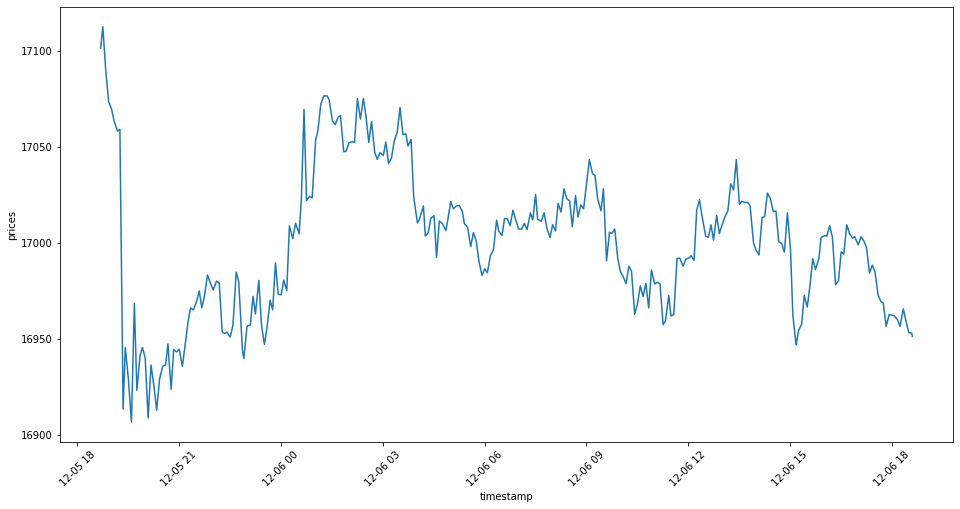

In [89]:
plt.figure(figsize=(16, 8))

sns.lineplot(x = 'timestamp', y = 'prices', data = df)

plt.xticks(rotation = 45)

plt.show()